<a href="https://colab.research.google.com/github/ichhitsapkota143/Machine-Learning/blob/main/Day18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Scaling (Standarization)**
🔵 When to use Standardization?
1.   When your data follows a Gaussian (normal) distribution.
2.   When using ML models that assume normally distributed data or are distance-based models.



# **Feature Scaling (Normalization)**
 Normalization usually refers to technique often applied as a part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting the difference in the range of values or losing information.
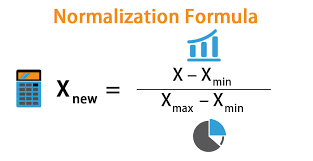

 🔵 When to use Normalization?

1. When you want features to be bounded (e.g., strictly between 0 and 1).

2. When you don't assume that your data follows a normal distribution.

3. When you are working with neural networks (like in deep learning) — normalization often helps the models converge faster.

4. When your model is sensitive to the scale of data and you want to preserve the shape of the original distribution (like KNN, K-means, SVM).



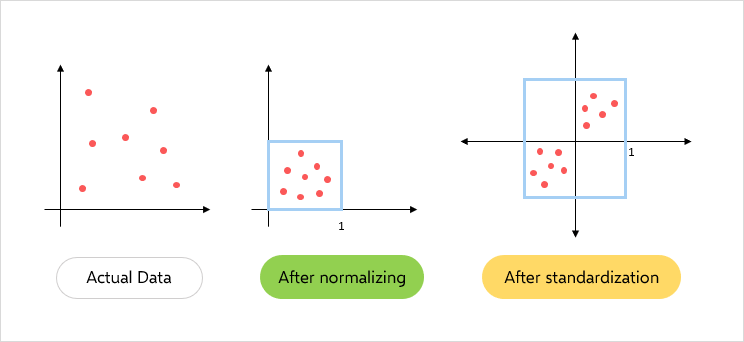

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('wine.data.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df=df.iloc[:,:3]
df

,Class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


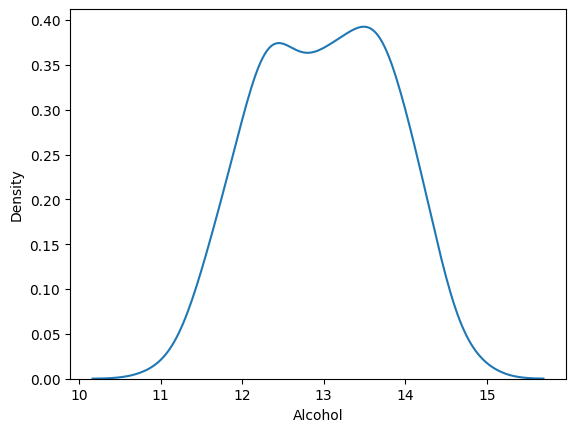

In [ ]:
sns.kdeplot(df['Alcohol'])
plt.show()

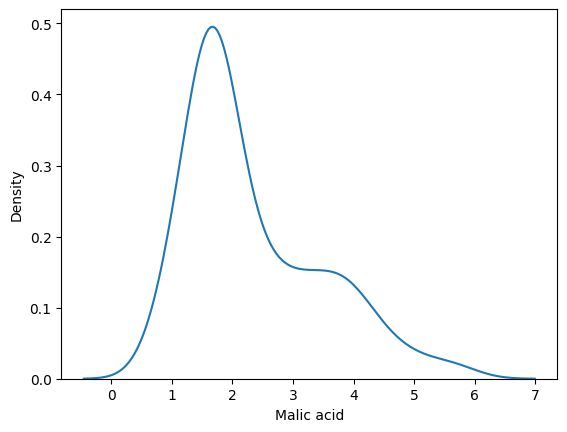

In [ ]:
sns.kdeplot(df['Malic acid'])
plt.show()

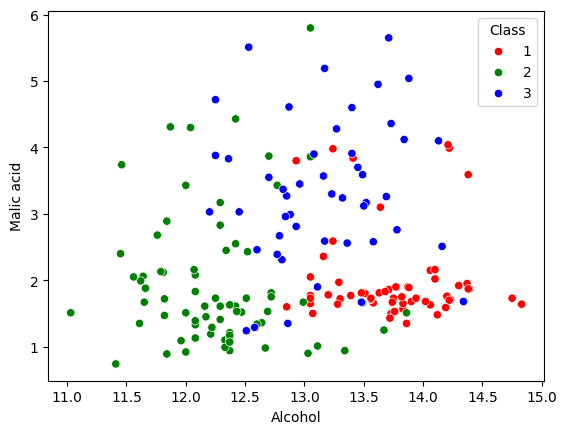

In [ ]:
#scatter plot
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(x='Alcohol',y='Malic acid',hue='Class',data=df,palette=color_dict)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class',axis=1),df['Class'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [ ]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


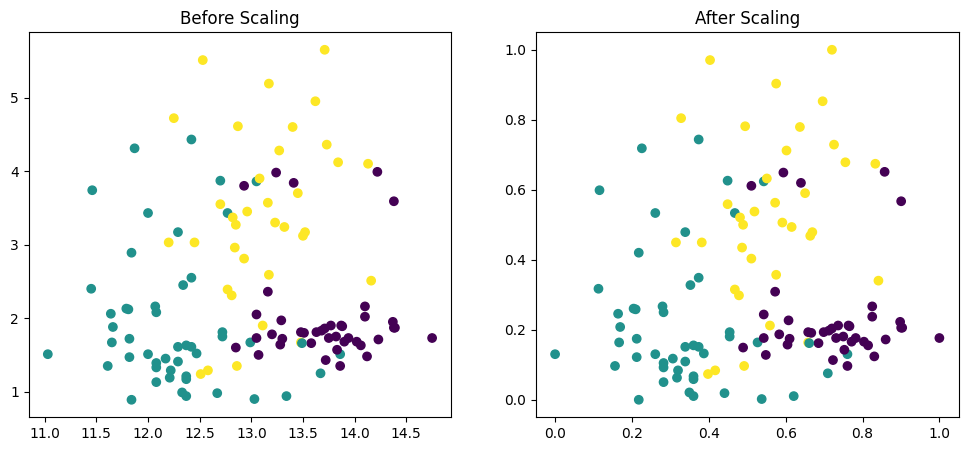

In [ ]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

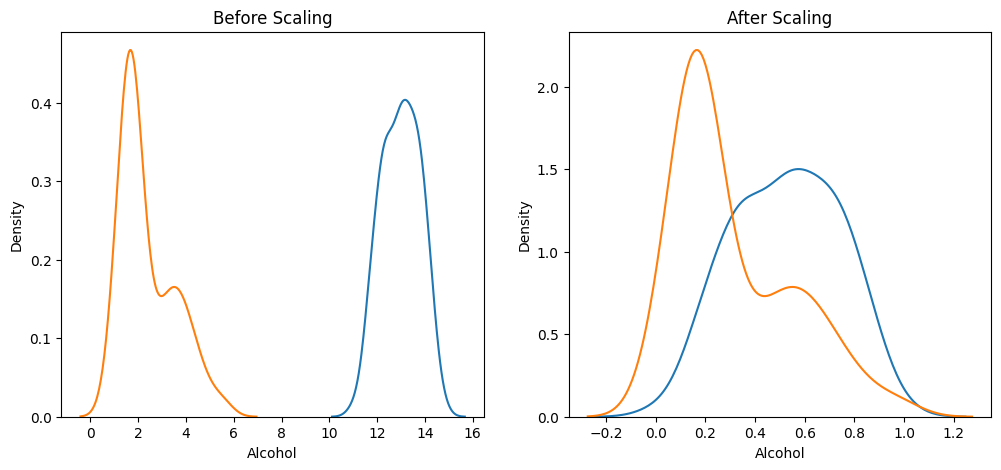

In [ ]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()

# **Mean Normalization**
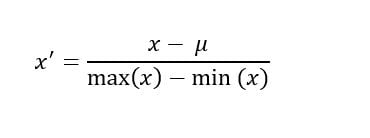

# **MaxAbsScaling**
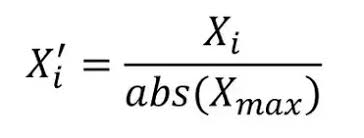

# **Robust Scaling**
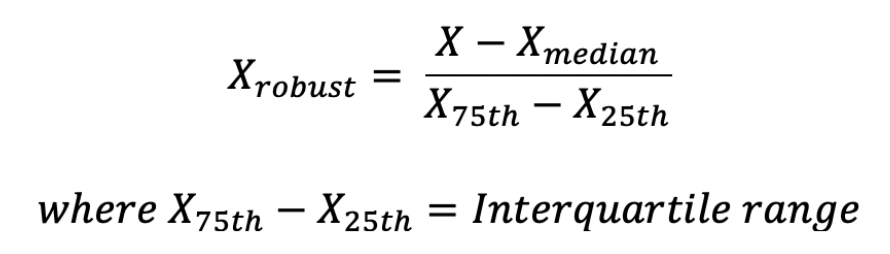